# MLP
* Neural Networks

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras import layers

## MNIST 데이터 불러오기

In [2]:
num_classes = 10
# 28 x 28 (pixel), 1 channel 흑백
input_shape = (28, 28, 1)

# 데이터 불러오기
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [4]:
# 60000장의 이미지, 28*28
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

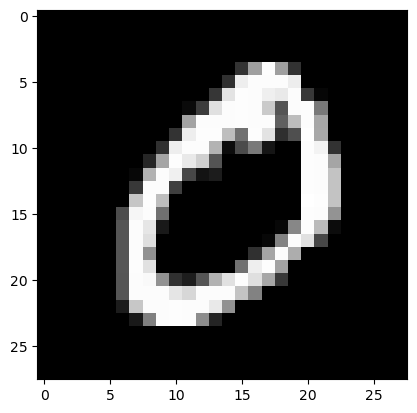

In [5]:
# 데이터를 이미지로 표현하기
plt.imshow(X_train[1].reshape(28, 28)) # 1차원 배열을 reshape으로 배열 차원 변경해주기
plt.gray()
plt.show()

In [6]:
# 이미지 scaling하기 [0 ~ 255] -> [0 ~ 1]
# 정수 데이터 타입 >> 실수 데이터 타입
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

In [8]:
# 이미지를 (28, 28, 1) 모양으로 변환하기
# 차원 확장
X_train = np.expand_dims(X_train, -1)
X_train.shape # 4차원

(60000, 28, 28, 1)

In [9]:
X_test = np.expand_dims(X_test, -1)

In [11]:
# one-hot encoding 변환하기 --> to_categorical()
y_train = keras.utils.to_categorical(y_train, num_classes)
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

## 모델 생성

In [13]:
# 모델 구성하기
model = keras.Sequential(
    [
        # 특징 추출 (feature extraction)
        # 
        keras.Input(shape=input_shape),
        # convolve
        layers.Conv2D(32, kernel_size=(3, 3), activation='relu'),
        # pooling
        layers.MaxPooling2D(pool_size=(2, 2)),
        # convolve
        layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
        # pooling
        layers.MaxPooling2D(pool_size=(2, 2)),

        # 2차원 >> 1차원
        layers.Flatten(),
        layers.Dense(num_classes, activation='softmax')
    ]
)

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 10)                  │          16,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 34,826 (136.04 KB)

 Trainable params: 34,826 (136.04 KB)

 Non-trainable params: 0 (0.00 B)

===== Model.summary() =====

입력 크기 : 28x28x1 ==> 28x28 이미지 / channel 1 (흑백)

kernel (필터) : (3, 3)

<< conv2d (Conv2D) >>

kernel : 32개, 3x3x1(흑백) = 9 --> 9x32 + 32(bias) = 320

<< conv2d_1 (Conv2D) >>

입력 크기 : 13x13x32 / 각 필터 파라미터 : 3x3 / 32(kernel 수)

kernel : 64개 --> 3x3x32x64 + 64(bias) = 18496

<< flatten (Flatten) >> (2차원 >> 1차원)

입력 크기 : 5x5x64 = 1600

<< dense (Dense) >>

분류 클래스 10개 --> 1600x10 + 10(bias) = 16010

In [17]:
# mini-batch size
# 한 번 weight 업데이트 하기 위해 필요한 데이터 양
batch_size = 128

# epoch 에폭 (학습 과정에서 전체 데이터 사용 횟수) 반복
# 보통 에폭은 100 정도로 잡는다. (하지만 시간이 많이 걸린다..)
epochs = 15

# 모델 훈련
# compile : 컴퓨터가 알아들을 수 있도록 표현 변경
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 학습
model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 50s 106ms/step - accuracy: 0.8188 - loss: 0.6479 - val_accuracy: 0.9785 - val_loss: 0.0762
Epoch 2/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 74s 89ms/step - accuracy: 0.9739 - loss: 0.0860 - val_accuracy: 0.9843 - val_loss: 0.0571
Epoch 3/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 46s 108ms/step - accuracy: 0.9819 - loss: 0.0596 - val_accuracy: 0.9872 - val_loss: 0.0486
Epoch 4/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 47s 112ms/step - accuracy: 0.9857 - loss: 0.0482 - val_accuracy: 0.9865 - val_loss: 0.0467
Epoch 5/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 75s 94ms/step - accuracy: 0.9880 - loss: 0.0406 - val_accuracy: 0.9863 - val_loss: 0.0419
Epoch 6/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 44s 101ms/step - accuracy: 0.9905 - loss: 0.0325 - val_accuracy: 0.9890 - val_loss: 0.0381
Epoch 7/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 47s 112ms/step - accuracy: 0.9910 - loss: 0.0298 - val_accuracy: 0.9872 - val_loss: 0.0413
Epoch 8/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 82s 112ms/step - accuracy: 0.9926 - loss: 0.0

ValueError: Arguments `target` and `output` must have the same rank (ndim). Received: target.shape=(None,), output.shape=(None, 10)

In [18]:
# one-hot encoding 변환하기 --> to_categorical()
y_test = keras.utils.to_categorical(y_test, num_classes)

# 평가
score = model.evaluate(X_test, y_test, verbose=0)

print('Test Loss :', score[0])
print('Test Accuracy :', score[1])

Test Loss : 0.041109565645456314
Test Accuracy : 0.9883000254631042
